In [1]:
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix

#pl.rc('text', usetex=True)
#pl.style.use("publication")

%matplotlib inline

In [2]:
df = pd.read_csv("dow_jones.csv")

In [3]:
X = df.iloc[:, [3, 14]].values
y = df.iloc[:, 4].values

X[:, 1] = X[:, 1] / 1000
y = pd.cut(y,4,labels = False) #Values above 5 give a higher error rate
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 17 )
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

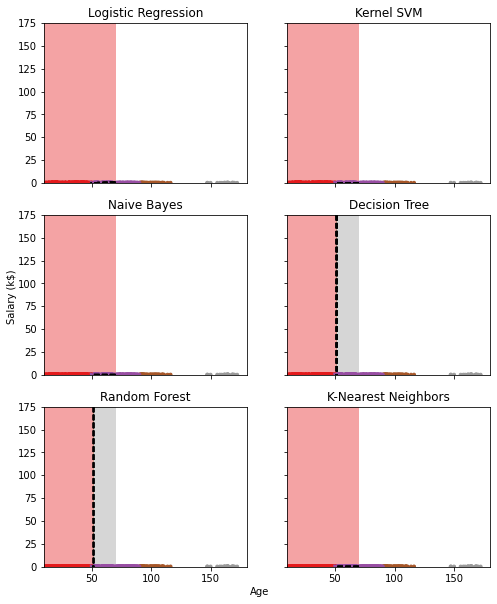

In [4]:
classifiers = [LogisticRegression(random_state=0),
               SVC(kernel="rbf", random_state=0),
               GaussianNB(),
               DecisionTreeClassifier(criterion='entropy', random_state=0, min_samples_split=20),
               RandomForestClassifier(n_estimators=30, n_jobs=4,
                                      criterion='entropy',
                                      random_state=0, min_samples_split=40),
               KNeighborsClassifier(p=2)]
names = ["Logistic Regression", "Kernel SVM", "Naive Bayes",
         "Decision Tree", "Random Forest", "K-Nearest Neighbors"]

fig, axs = pl.subplots(3, 2, sharex="all", sharey="all", figsize=(8, 10))

for ax, name, classifier in zip(np.array(axs).flatten(), names, classifiers):
    classifier = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)

    N = 1000
    x1 = np.linspace(10, 70, N)
    x2 = np.linspace(0, 175, N)
    X1, X2 = np.meshgrid(x1, x2)
    y_grid = classifier.predict(sc.transform(np.hstack([X1.flatten()[:, None],
                                                        X2.flatten()[:, None]])))

    pl.sca(ax)
    pl.contourf(x1, x2, y_grid.reshape((N, N)), cmap="Set1", alpha=.4)
    pl.contour(x1, x2, y_grid.reshape((N, N)), colors="black", linestyles="--")
    pl.scatter(*X.T, c=y,
               cmap="Set1", marker=".")
    
#     table = (r"\begin{tabular}{ c || c | c } "
#              r"  & +  & - \\ \hline \hline"
#              r"+ & %i & %i \\ \hline"
#              r"- & %i & %i \\"
#              r"\end{tabular}") % tuple(cm.flatten().tolist())
#     pl.text(44, 105, table, size=12, bbox=dict(facecolor='white',
#                                                edgecolor='black',
#                                                alpha=.8,
#                                                pad=10))

    pl.title(name)

fig.text(0.5, 0.09, 'Age', ha='center', va='center')
fig.text(0.07, 0.5, 'Salary (k\$)', ha='center', va='center', rotation='vertical')
fig.savefig("classifiers_comparison.png", dpi=300)